In [1]:
file_path = "data_files/financial_basis/sp500_close.csv"

In [2]:
import pandas as pd
from plotting import plot_ts
from fintools import calculate_return
from functools import partial
from functions import compose
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [3]:
close = pd.read_csv(file_path, index_col = 0, parse_dates = True)

In [4]:
close.head()

AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
2013-02-08  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
2013-02-09    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
2013-02-12  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

              ADM  ...   XLNX     XL    XOM   XRAY    XRX    XYL    YUM  \
2013-02-08  30.22  ...  37.51  28.24  88.61  42.87  31.84  27.09  65.30   
2013-02-09    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  30.28  ...  37.46  28.31  88.28  42.84  31.96  27.46  64.55   
2013-02-12  30.81  ...  37.58  28.41  88.46  42.87  31.84  27.95  64.75   

              ZBH   ZION    ZTS  
2013-02-08  75.85  24.14  33.05  
2013-02-09    NaN    NaN    NaN  
2013-02-10    NaN    NaN    NaN  
2013-02-11  75.65  24.21  33.26  
2013-02-12  75.44  24.49  33.74  

[5 rows x 505 columns]

In [5]:
def choose_stock(ticker = 'GOOG'):
    def _choose_stock(df):
        if isinstance(ticker, str):
            columns = [ticker]
        else:
            columns = ticker
        return df[columns].copy().dropna()
    return _choose_stock

def ma_n(n:int, col:str):
    def _ma_n(df):
        df[f"{col}_ma{n}"] = df[col].rolling(n).mean()
        return df
    return _ma_n


goog_pipeline = compose(
    choose_stock('GOOG'), 
    partial(calculate_return, price_col = 'GOOG')
    )

goog_aapl_pipeline = compose(
    choose_stock(['GOOG', 'AAPL'])
)

In [6]:
goog = goog_pipeline(close)

goog

GOOG  net_return  gross_return  log_return
2014-03-27   558.46         NaN           NaN         NaN
2014-03-28   559.99    0.002740      1.002740    0.002736
2014-03-31   556.97   -0.005393      0.994607   -0.005408
2014-04-01   567.16    0.018295      1.018295    0.018130
2014-04-02   567.00   -0.000282      0.999718   -0.000282
...             ...         ...           ...         ...
2018-02-01  1167.70   -0.001915      0.998085   -0.001916
2018-02-02  1111.90   -0.047786      0.952214   -0.048966
2018-02-05  1055.80   -0.050454      0.949546   -0.051771
2018-02-06  1080.60    0.023489      1.023489    0.023218
2018-02-07  1048.58   -0.029632      0.970368   -0.030080

[975 rows x 4 columns]

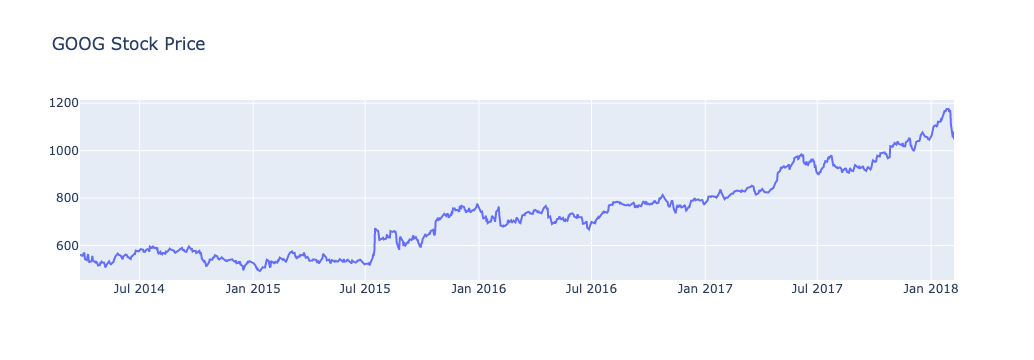

In [7]:
plot_ts(
    goog.index, 
    goog['GOOG'], 
    'GOOG Stock Price'
)

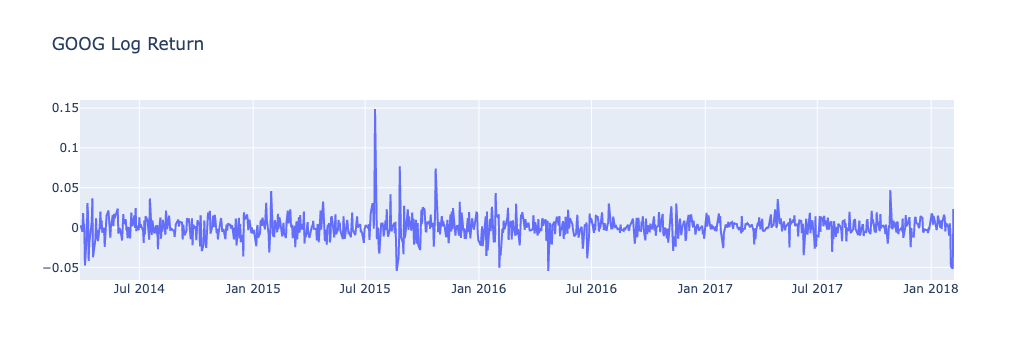

In [8]:
plot_ts(
    goog.index, 
    goog.log_return, 
    'GOOG Log Return'
)

In [9]:
goog

GOOG  net_return  gross_return  log_return
2014-03-27   558.46         NaN           NaN         NaN
2014-03-28   559.99    0.002740      1.002740    0.002736
2014-03-31   556.97   -0.005393      0.994607   -0.005408
2014-04-01   567.16    0.018295      1.018295    0.018130
2014-04-02   567.00   -0.000282      0.999718   -0.000282
...             ...         ...           ...         ...
2018-02-01  1167.70   -0.001915      0.998085   -0.001916
2018-02-02  1111.90   -0.047786      0.952214   -0.048966
2018-02-05  1055.80   -0.050454      0.949546   -0.051771
2018-02-06  1080.60    0.023489      1.023489    0.023218
2018-02-07  1048.58   -0.029632      0.970368   -0.030080

[975 rows x 4 columns]

In [10]:
goog_pipeline = compose(
    choose_stock('GOOG'), 
    partial(calculate_return, price_col = 'GOOG'),
    ma_n(10,"GOOG"),
    ma_n(20,"GOOG"),
    ma_n(100,"GOOG"),
    )

goog = goog_pipeline(close)
goog.head()

GOOG  net_return  gross_return  log_return  GOOG_ma10  \
2014-03-27  558.46         NaN           NaN         NaN        NaN   
2014-03-28  559.99    0.002740      1.002740    0.002736        NaN   
2014-03-31  556.97   -0.005393      0.994607   -0.005408        NaN   
2014-04-01  567.16    0.018295      1.018295    0.018130        NaN   
2014-04-02  567.00   -0.000282      0.999718   -0.000282        NaN   

            GOOG_ma20  GOOG_ma100  
2014-03-27        NaN         NaN  
2014-03-28        NaN         NaN  
2014-03-31        NaN         NaN  
2014-04-01        NaN         NaN  
2014-04-02        NaN         NaN

In [11]:
import plotly.graph_objects as go

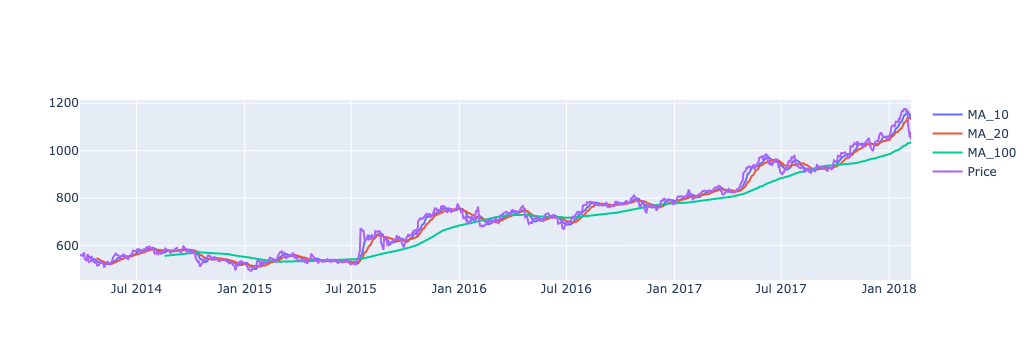

In [12]:
go.Figure(
    [go.Scatter(x = goog.index, y = goog.GOOG_ma10,name = 'MA_10'),
     go.Scatter(x = goog.index, y = goog.GOOG_ma20,name = 'MA_20'),
     go.Scatter(x = goog.index, y = goog.GOOG_ma100,name = 'MA_100'),
     go.Scatter(x = goog.index, y = goog.GOOG, name = 'Price')
    ]
)

In [13]:
goog_appl = choose_stock(['AAPL','GOOG'])(close)

In [14]:
goog_appl.dropna().copy().rolling(50).cov()

AAPL         GOOG
2014-03-27 AAPL        NaN          NaN
           GOOG        NaN          NaN
2014-03-28 AAPL        NaN          NaN
           GOOG        NaN          NaN
2014-03-31 AAPL        NaN          NaN
...                    ...          ...
2018-02-05 GOOG  34.825709  2738.554490
2018-02-06 AAPL  19.121371    38.174468
           GOOG  38.174468  2691.756465
2018-02-07 AAPL  22.052882    49.980378
           GOOG  49.980378  2678.778214

[1950 rows x 2 columns]

In [15]:
def get_airline():
    airline_path = "data_files/time_series_analysis/airline_passengers.csv"
    return pd.read_csv(airline_path, index_col = "Month", parse_dates=True)

airline = get_airline()
airline['ewm_small'] = airline.Passengers.ewm(alpha = 0.05, adjust = False).mean()
airline['ewm_large'] = airline.Passengers.ewm(alpha = 0.3, adjust = False).mean()

#### Exponential weighted moving average

Consider current value and previous moving average, weighted by $\alpha$ and $1- \alpha$, the larger $\alpha$ is the model consider more on current value, vice versa.

$\bar y_{t} = \alpha * y_t + (1 - \alpha) * \bar y_{t-1}$

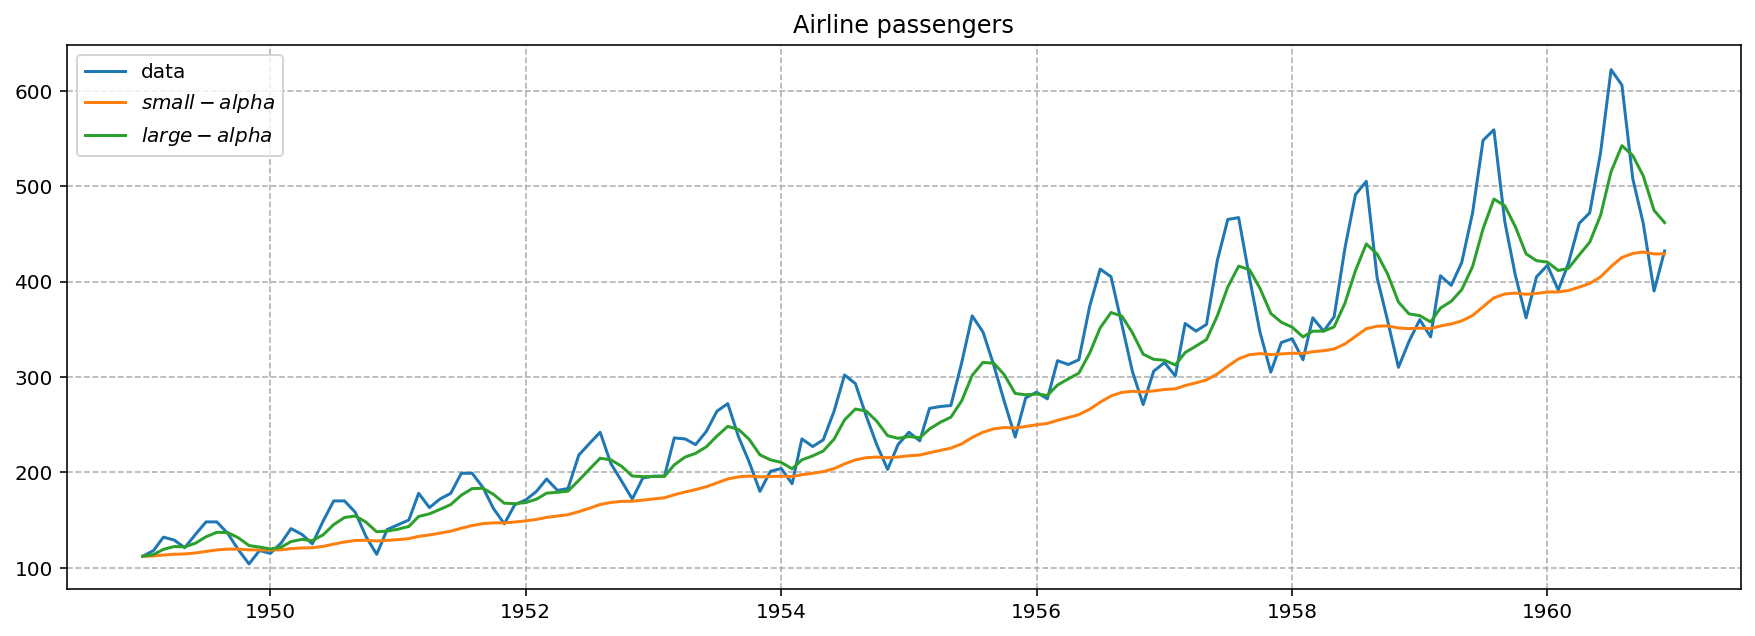

In [16]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(airline.index, airline.Passengers, label = 'data')
plt.plot(airline.index, airline.ewm_small, label = '$small-alpha$')
plt.plot(airline.index, airline.ewm_large, label = '$large-alpha$')
plt.grid(linestyle = '--')
plt.title("Airline passengers")
plt.legend(loc = 'upper left')
plt.show()

In [17]:
data = airline["Passengers"].values

def ewm(data, alpha = 0.2):
    """Calculate ewm values, simply weighted average over current and previous mean
    
    Args:
        data: list, np array, or pd series
        alpha: weight on current value, float
    """
    ewms = []
    for val in data:
        if len(ewms) > 0:
            ewm_val = alpha * val + (1-alpha) * ewms[-1]
        else:
            ewm_val = val
        ewms.append(ewm_val)

    ewms = np.array(ewms)
    return ewms

# calculate ewm by hand
ewm_by_hand = ewm(data)

# calculate ewm with pandas
pd_result = airline['Passengers'].ewm(alpha = 0.2, adjust = False).mean().values

# check whether the 2 values equals
by_hand_equals_library = all(ewm_by_hand == pd_result)

# and print out a message
message = f"""Our calculation is {'equal' if by_hand_equals_library else 'not equal'} \
to Pandas Library"""
print(message)

Our calculation is equal to Pandas Library


**EWM on stock price**

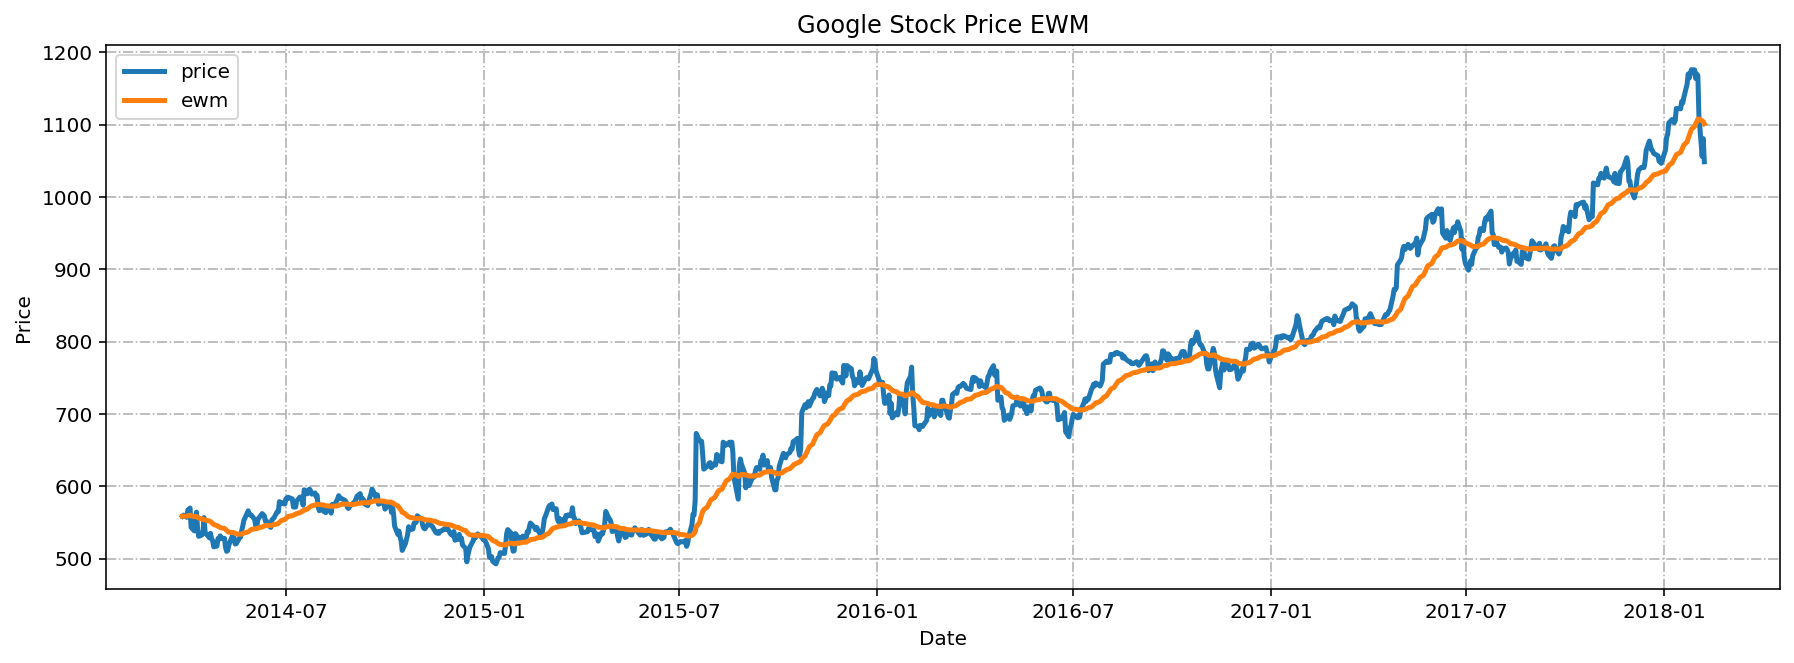

In [18]:
goog_ewm = ewm(goog['GOOG'], alpha = 0.05)

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(goog.index, goog.GOOG, label = 'price', lw = 2.5)
plt.plot(goog.index, goog_ewm, label = 'ewm', lw = 2.5)
plt.legend(loc = 'upper left')
plt.grid(linestyle = '-.')
plt.title("Google Stock Price EWM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

#### Exponential Smoothing Forecast

This equation is hard to understand at first: 
$\hat y_t = \alpha y_t + (1 - \alpha) \hat y_{t - 1}$.    
Write Down the equaltion and do some simple math.   

*Forcast Model*    
$\hat y_{t + 1 | t} = \alpha y_t + (1 - \alpha)y_{t|t-1}$

*Component Form*    
Forecast equation: $\hat y_{t+h|t} = l_t$, use current moving average as next prediction   
Level function:    $l_t = \alpha y_t + (1 - \alpha) l_{t-1}$, calculate current moving average.

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [22]:
goog = goog_pipeline(close)

*Fit an EWMA model*

In [23]:
ses = SimpleExpSmoothing(goog.GOOG.values)
ses_result = ses.fit(smoothing_level = 0.1, optimized = False)
forecast = ses_result.forecast(300)

*Grab fitted values*

In [24]:
ses_result.fittedvalues[:20]

array([558.46      , 558.46      , 558.613     , 558.4487    ,
       559.31983   , 560.087847  , 561.0530623 , 559.26175607,
       557.15058046, 556.92552242, 557.64697018, 555.97727316,
       553.43954584, 551.34759126, 549.85683213, 550.52514892,
       549.08263403, 547.03637062, 545.81373356, 543.92636021])

*Call predict with datetime, int or string parameters*

In [25]:
ses_result.predict?

Signature: ses_result.predict(start=None, end=None)
Docstring:
predict(self, start=None, end=None)

In-sample prediction and out-of-sample forecasting

Parameters
----------
start : int, str, or datetime, optional
    Zero-indexed observation number at which to start forecasting, ie.,
    the first forecast is start. Can also be a date string to
    parse or a datetime type. Default is the the zeroth observation.
end : int, str, or datetime, optional
    Zero-indexed observation number at which to end forecasting, ie.,
    the first forecast is start. Can also be a date string to
    parse or a datetime type. However, if the dates index does not
    have a fixed frequency, end must be an integer index if you
    want out of sample prediction. Default is the last observation in
    the sample.

Returns
-------
forecast : ndarray
    Array of out of sample forecasts.
File:      /opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/results.py
Type:      method


*Plot with matplotlib*

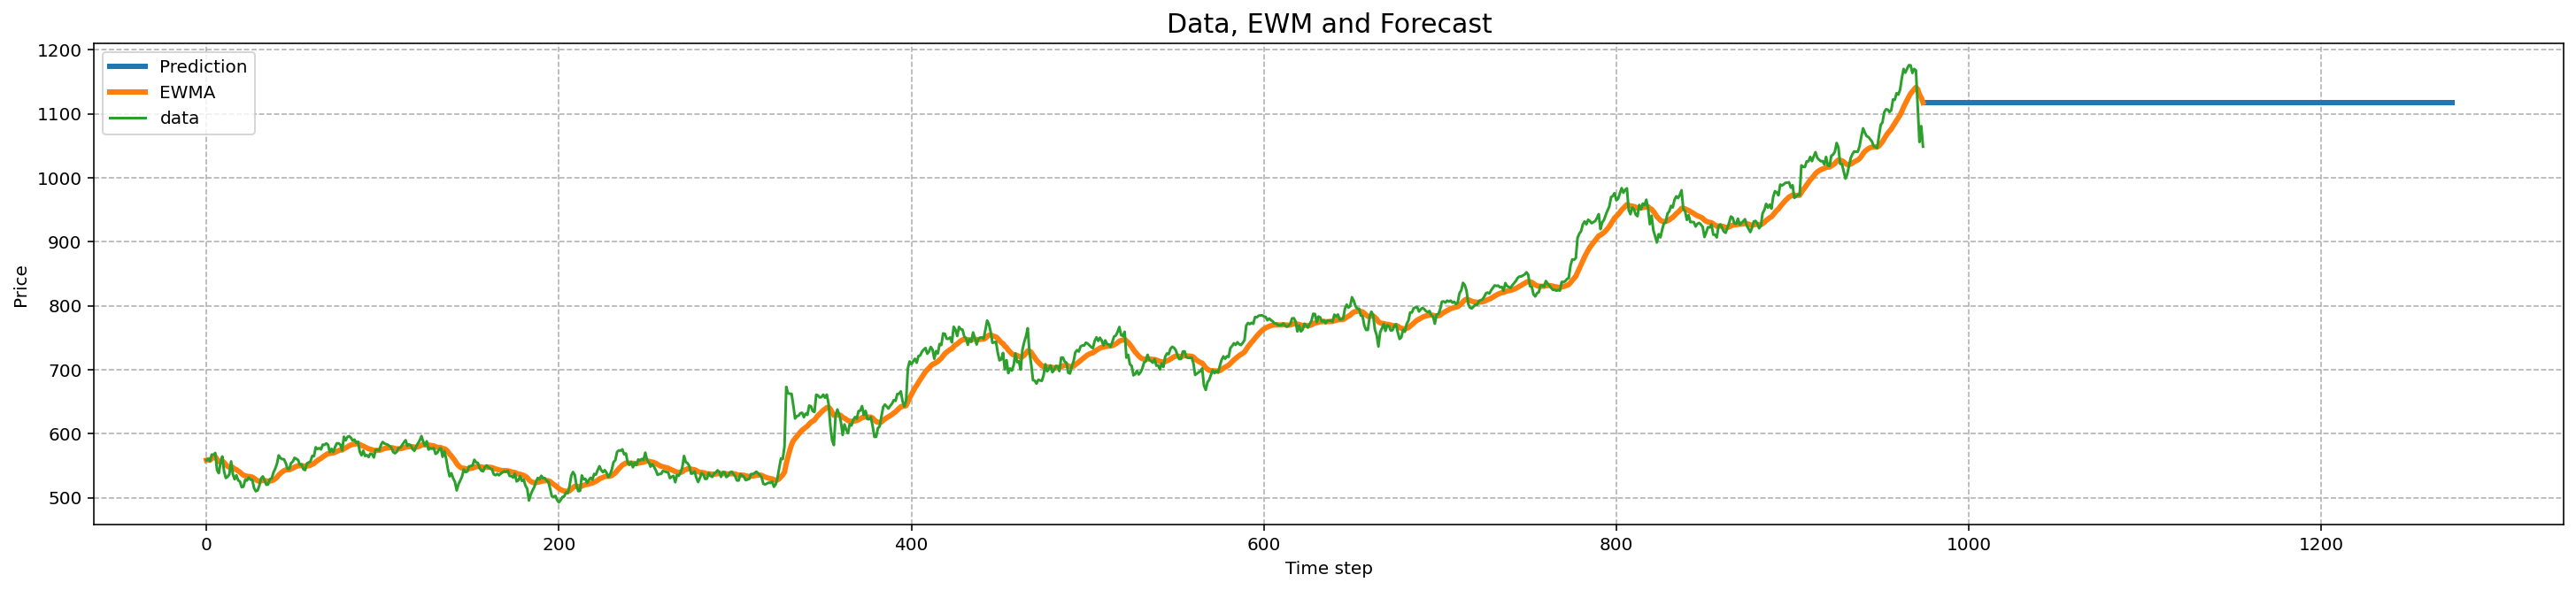

In [26]:
x_train = np.arange(len(goog))
y_train = goog.GOOG.values
x_extro = np.arange(len(goog), len(goog) + len(forecast))
y_extro = forecast
ewms = goog.GOOG.ewm(alpha = 0.1).mean().values

fig, ax = plt.subplots(figsize = (25,5))
plt.plot(x_extro, y_extro, lw = 3, label = "Prediction")
plt.plot(x_train, ewms, label = 'EWMA', lw=  3)
plt.plot(x_train, y_train, label = 'data')
plt.grid(linestyle = '--')
plt.legend(loc = 'upper left')
plt.title("Data, EWM and Forecast", fontsize = 15)
plt.xlabel("Time step")
plt.ylabel("Price")
plt.show()

*Not useless*

#### Holt's Linear trend model

Forecast equation:  $\hat{y}_{t+h \mid t}=l_{t}+h b_{t}$    
Level equation: $l_{t}=\alpha y_{t}+(1-\alpha)\left(l_{t-1}+b_{t-1}\right)$          
Trend equation: $b_{t}=\beta\left(l_{t}-l_{t-1}\right)+(1-\beta) b_{t-1}$       

In [27]:
from statsmodels.tsa.holtwinters import Holt

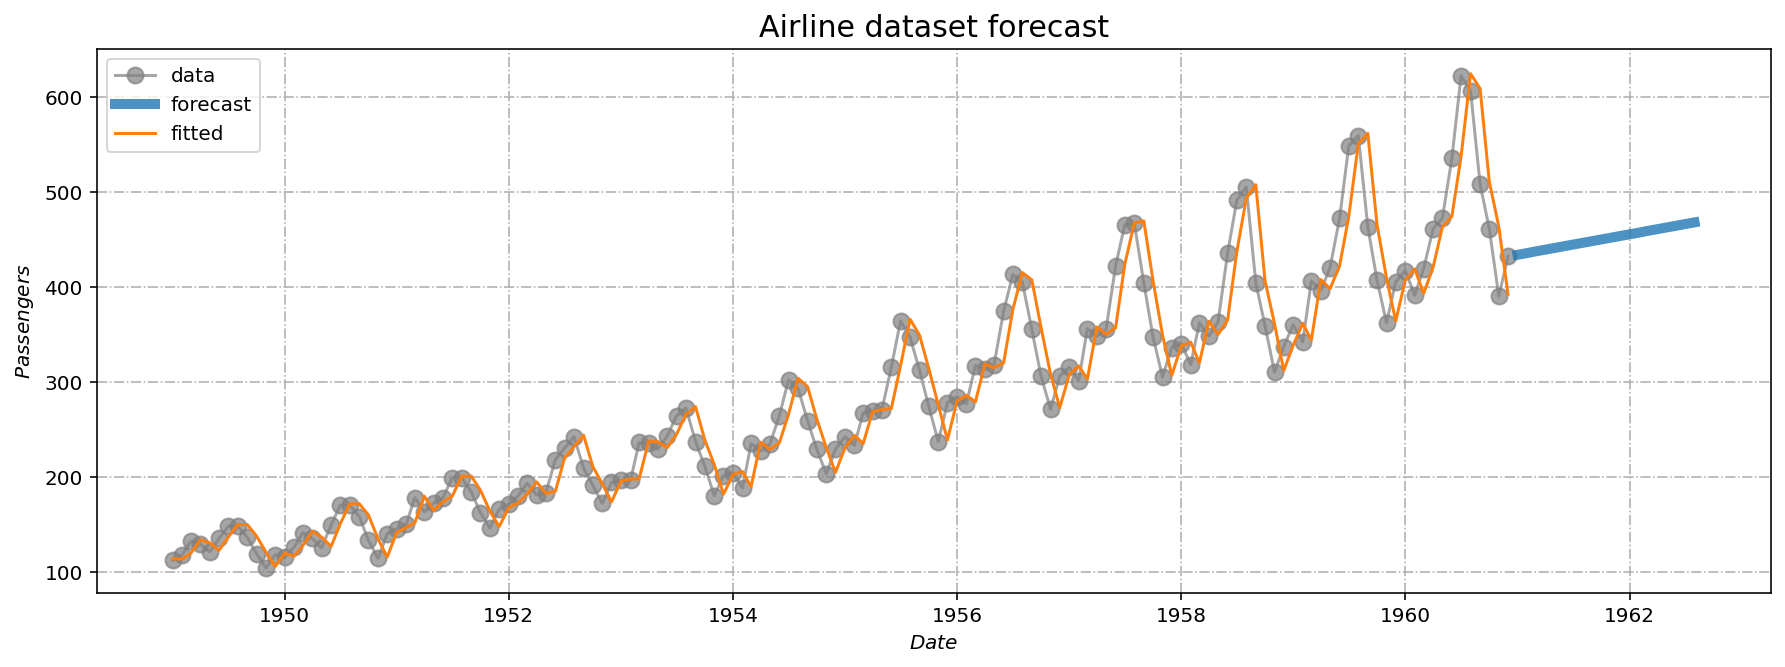

In [28]:
airline.index.freq = "MS"

model = Holt(airline[['Passengers']])
result = model.fit()
fitted_values = result.fittedvalues
forecast = result.forecast(20)

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(airline['Passengers'], marker = 'o', markersize = 8, alpha = 0.7, color = 'gray', label = 'data')
plt.plot(forecast, lw =5, alpha = 0.8, label = 'forecast')
plt.plot(fitted_values, label = 'fitted')
plt.grid(linestyle = '-.')
plt.title("Airline dataset forecast", fontsize = 15)
plt.xlabel("$Date$")
plt.ylabel("$Passengers$")
plt.legend(loc = 'upper left')
plt.show()

In [29]:
airline = get_airline()
airline.index.freq = "MS"

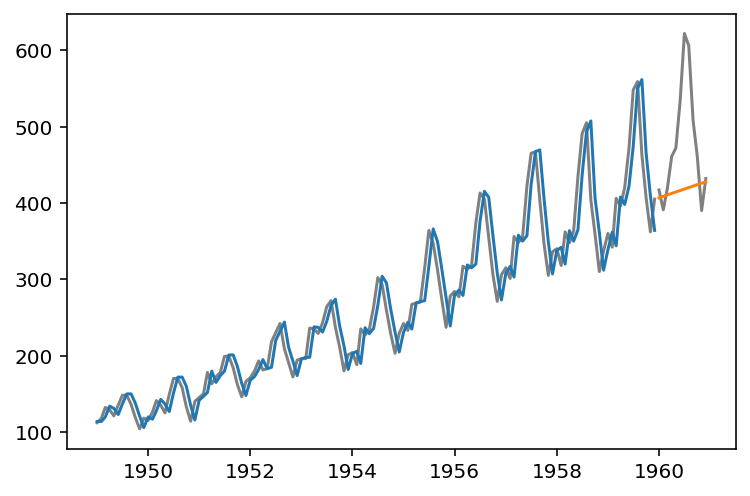

In [30]:
Ntest = 12
train = airline.iloc[:-Ntest].copy()
test = airline.iloc[-Ntest:].copy()

model = Holt(train)
result = model.fit()
train['Holt'] = result.fittedvalues
test['Holt'] = result.forecast(Ntest)

plt.plot(train['Passengers'], color = 'gray')
plt.plot(test['Passengers'], color = 'gray')
plt.plot(train['Holt'])
plt.plot(test['Holt'])

#### Holt winters additive   


$\hat{y}_{t+h \mid t}=l_{t}+h b_{t}+s_{t+h-m k}$   
$l_{t}=\alpha\left(y_{t}-s_{t-m}\right)+(1-\alpha)\left(l_{t-1}+b_{t-1}\right)$   
$b_{t}=\beta\left(l_{t}-l_{t-1}\right)+(1-\beta) b_{t-1}$  
$s_{t}=\gamma\left(y_{t}-l_{t-1}-b_{t-1}\right)+(1-\gamma) s_{t-m}$

#### Holt winters multiplicative
$\hat{y}_{t+h \mid t}=\left(l_{t}+h b_{t}\right) s_{t+h-m k}$          
$l_{t}=\alpha \frac{y_{t}}{s_{t-m}}+(1-\alpha)\left(l_{t-1}+b_{t-1}\right)$          
$b_{t}=\beta\left(l_{t}-l_{t-1}\right)+(1-\beta) b_{t-1}$             
$s_{t}=\gamma \frac{y_{t}}{l_{t-1}+b_{t-1}}+(1-\gamma) s_{t-m}$          

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

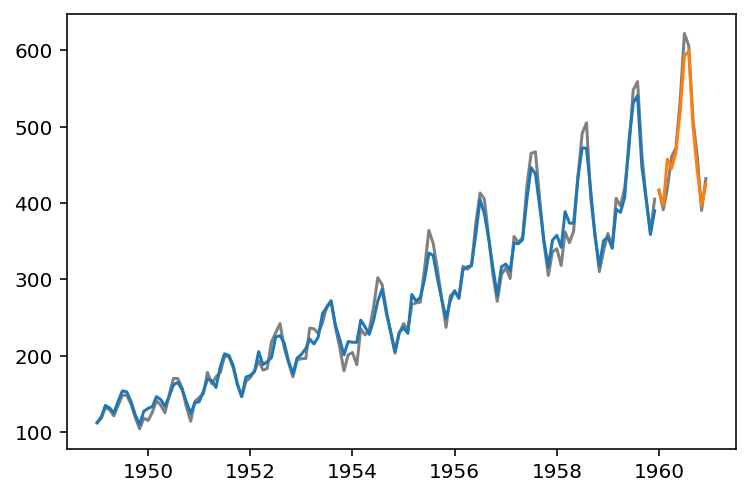

In [32]:
hw = ExponentialSmoothing(train['Passengers'], trend = 'add', seasonal = 'add', seasonal_periods = 12)
hw_result = hw.fit()

train['HoltWinters'] = hw_result.fittedvalues
test['HoltWinters'] = hw_result.forecast(Ntest)

plt.plot(train['Passengers'], color = 'gray')
plt.plot(test['Passengers'], color = 'gray')
plt.plot(train['HoltWinters'])
plt.plot(test['HoltWinters'])
plt.show()

#### AR(p)
$\hat{y}_{t}=b+\varphi_{1} y_{t-1}+\varphi_{2} y_{t-2}+\ldots+\varphi_{p} y_{t-p}$    
${y}_{t}=b+\varphi_{1} y_{t-1}+\varphi_{2} y_{t-2}+\ldots+\varphi_{p} y_{t-p} + \epsilon_t$  

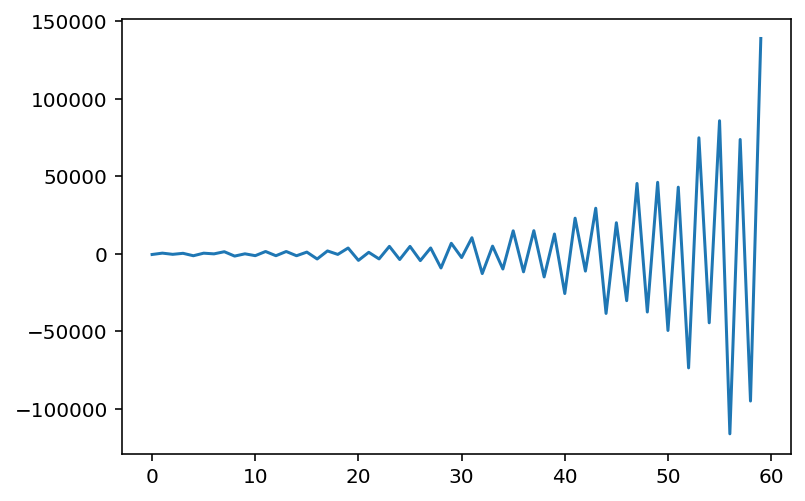

In [33]:
p = 12
np.random.seed(42)
y = 1 + 100*np.random.random(size = p)
coefs = -1 + 2 * np.random.random(size = p)
b = np.random.random()
for _ in range(80):
    y_next = np.sum(y[-p:]* coefs) + b + np.random.normal(0,1)
    y = np.append(y, y_next)
plt.plot(y[-60:])

#### Ma(q)
$y_{t}=c+\varepsilon_{t}+\theta_{1} \varepsilon_{t-1}+\theta_{2} \varepsilon_{t-2}+\ldots+\theta_{q} \varepsilon_{t-q}$   

$E[\hat y_t] = c$ -  Mean reverting

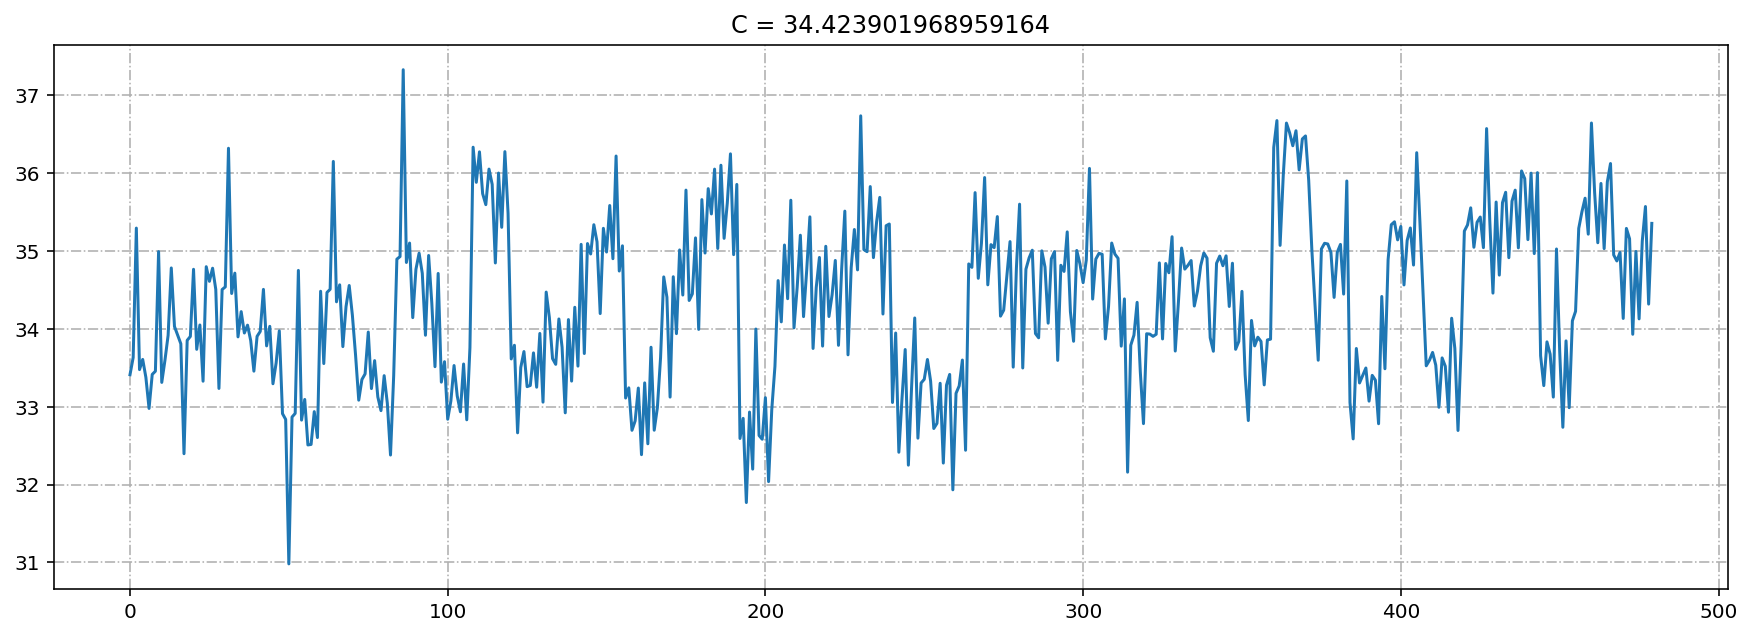

In [34]:
from scipy import stats
q = 12
low = 1
high = 100
c = low + (high-low)*np.random.random()
epsilon_dist = stats.norm(0,1)
epsilons = epsilon_dist.rvs(size = q)
thetas = np.random.random(size = q)
y = np.array([])
for _ in range(40):
    eps = epsilon_dist.rvs()
    y_next = c + eps  + thetas * epsilons[-q:]
    y = np.append(y, y_next)
    epsilons = np.append(epsilons,eps)

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(y)
plt.title(f"C = {c}")
plt.grid(linestyle = '-.')
plt.show()

#### ARMA(p,q)

$y_{t}=b+\varphi_{1} y_{t-1}+\ldots+\varphi_{p} y_{t-p}+\theta_{1} \varepsilon_{t-1}+\ldots+\theta_{q} \varepsilon_{t-q}+\varepsilon_{t}$   


#### ARIMA(p,d,q)

$I(d)$ - integrate d times - processing data for stationary

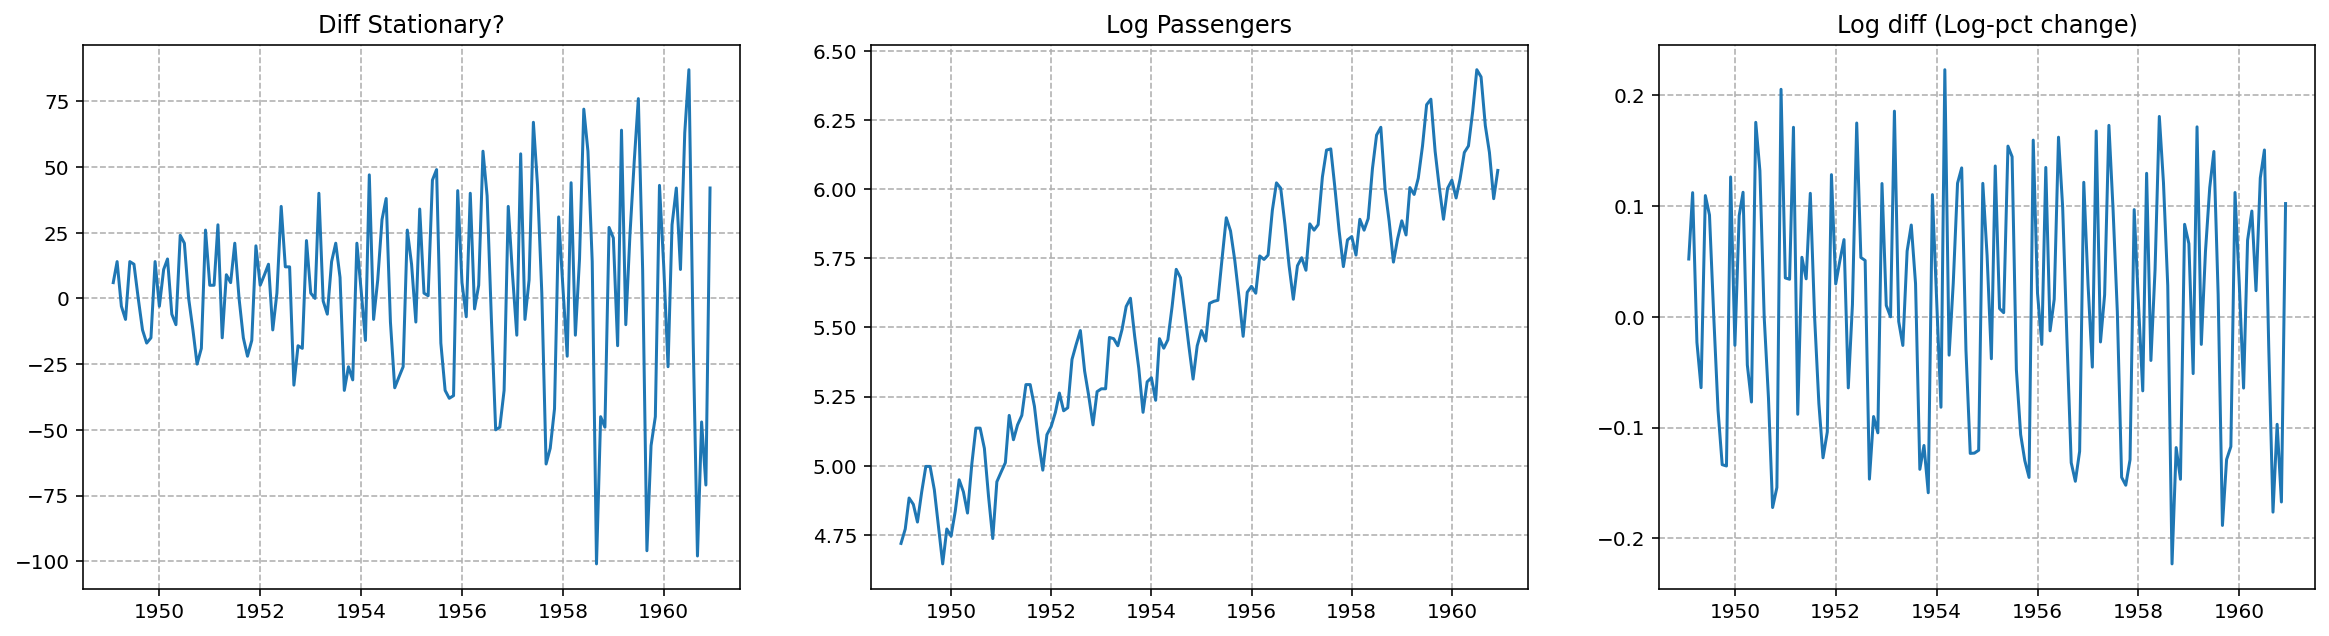

In [36]:
airline = get_airline()
airline['LogPassengers']= np.log(airline['Passengers'])
airline.index.freq = "MS"
airline['1stdiff'] = airline['Passengers'].diff()
airline['1stlogdiff'] = airline['LogPassengers'].diff()

fig, ax = plt.subplots(figsize = (20,5))
plt.subplot(1,3,1)
plt.plot(airline['1stdiff'])
plt.grid(linestyle = '--')
plt.title("Diff Stationary?")
plt.subplot(1,3,2)
plt.plot(airline['LogPassengers'])
plt.grid(linestyle = '--')
plt.title("Log Passengers")
plt.subplot(1,3,3)
plt.plot(airline['1stlogdiff'])
plt.grid(linestyle = '--')
plt.title("Log diff (Log-pct change)")
plt.show()